# ４．教師あり学習ハンズオン

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#はじめに" data-toc-modified-id="はじめに-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>はじめに</a></span></li><li><span><a href="#目的の理解" data-toc-modified-id="目的の理解-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>目的の理解</a></span></li><li><span><a href="#データの準備" data-toc-modified-id="データの準備-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>データの準備</a></span><ul class="toc-item"><li><span><a href="#データのインポート" data-toc-modified-id="データのインポート-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>データのインポート</a></span></li><li><span><a href="#データの確認" data-toc-modified-id="データの確認-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>データの確認</a></span></li></ul></li><li><span><a href="#データの前処理" data-toc-modified-id="データの前処理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>データの前処理</a></span><ul class="toc-item"><li><span><a href="#説明変数と目的変数の設定" data-toc-modified-id="説明変数と目的変数の設定-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>説明変数と目的変数の設定</a></span></li><li><span><a href="#データの分割" data-toc-modified-id="データの分割-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>データの分割</a></span></li><li><span><a href="#データの標準化" data-toc-modified-id="データの標準化-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>データの標準化</a></span></li></ul></li><li><span><a href="#学習" data-toc-modified-id="学習-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>学習</a></span><ul class="toc-item"><li><span><a href="#線形(重)回帰" data-toc-modified-id="線形(重)回帰-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>線形(重)回帰</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Ridge回帰" data-toc-modified-id="Ridge回帰-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Ridge回帰</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Elastic Net</a></span></li><li><span><a href="#ニューラルネットワーク" data-toc-modified-id="ニューラルネットワーク-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>ニューラルネットワーク</a></span></li></ul></li></ul></div>

## はじめに

教師あり学習の流れは以下の通りです。

<img src="./data/flow.png" width="600"> 

## 目的の理解

本講座では**航空機の翼のブレードの自己生成ノイズに関するデータセット"Airfoil Self-Noise Data Set( [airfoil data](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise))"**を使用します。  

航空機の翼の形状を決定する試験に風洞が利用されます。風洞とは、固定した模型の周囲に空気を流して仮想的に大気中を飛んでいる状態を再現し、そこで模型に働く力や周囲の風の流れを計測する設備を指します。これは、人類初の有人動力飛行に成功したライト兄弟の時代から利用されてきた方法です。そして現在では、航空機や宇宙機、ロケットなどの機体設計に限らず、自動車や鉄道、高層ビルや橋梁設計などの分野でも、風洞は幅広く使われています。

<img src="./data/datasets_explanation.png" width="700"> 

使用するデータは、  
**説明変数**：  
上図に示す翼の設計パラメータとノイズ周波数の計5種類  
**目的変数**：  
騒音の大きさの指標であるスケーリングされた音圧レベルの1種類  
**データ数**：  
1503個  
です。  

これらのデータを使って我々は、  
**目標**：  
説明変数と目標変数の関係をモデル化、つまり回帰すること  

です。  

モデルが得られると、新たな条件での騒音の大きさを予測したり、騒音が最小となるような条件を見つけることができます。  

## データの準備

### データのインポート
データは本Jupyter Notebook"Supervised_learning_firstpart.ipynb"と同じ階層にあるフォルダ"data"内にあるcsvファイル"airfoil_self_noise.csv"です。Jupyter Notebook上でcsvファイルを使えるようにします。 

次のセルを選択してください。選択すると青色の縁で囲われるようになります。緑色の縁は編集モードですが実行もできます。  
「Ctrl＋Enter」を押して実行してください。

In [1]:
## データのインポートに必要なライブラリの使用を宣言します
import pandas as pd

## 変数dataにデータの情報を代入します
data = pd.read_csv("./data/airfoil_self_noise.csv",delimiter=";")

Pandasというライブラリからread_csvというメソッドを用いて、DataFrame型としてデータが変数dataに読み込まれました。  
実行しただけで何も表示されません。それでOKです。  

それでは変数dataに読み込まれたデータがどのようなものか、確認していきましょう。

（注意）ライブラリは、一からプログラミングを記述するのではなく、簡単に実行できるツール（機能）の集まりのことです。  
そのライブラリに収納されている具体的なツールがメソッドです。  
使いたいときに使えるライブラリとメソッドを覚えておくと便利ですが、使用するときに調べて使えればOKです。  
弊社では"製造業のためのPython入門"として最低限学んでおきたいライブラリやメソッドに関する教材を用意しています。  
pandasを含む様々なPythonライブラリの使い方をまとめた日本語の資料としてはnkmkさんのブログ([note.nkmk,me](https://note.nkmk.me/python-pandas-dataframe-values-columns-index/))が非常におすすめです。筆者もコードを書く際、よく参考にしています。 

### データの確認

データの確認として、まずインポートがきちんと行われたことを確認しましょう。データはDaraFrame型として読み込まれたのでしたね。  
`type(変数)`で変数の型を確認します。
次のコードを実行してください。

In [2]:
## データの型を確認
print(type(data))

<class 'pandas.core.frame.DataFrame'>


出力結果は、DataFrame型として読み込まれたことを示します。

次にデータの形を確認します。csvにはヘッダーとして各説明変数と目的変数の全6個のパラメータ名が、その下に1503個のデータ群があります。つまり1503行6列のデータ群の形になっているかを確認します。`変数.shape`で変数に代入された配列データの行数と列数を取得します。  
次のコードを実行してください。

In [3]:
## shapeの確認
print("shape of data : " + str(data.values.shape))

shape of data : (1503, 6)


データの形として行数が1503、列数が6になっていることがわかりました。

そのデータの先頭から5行目までを表示してみましょう。

In [4]:
## データの確認
data.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


左から5列目までが説明変数の各パラメータ（カラム）名とそのデータ、一番右の列が目的変数のカラム名とそのデータです。  
このデータの統計量を調べてみましょう。

In [5]:
data.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


このように必要な情報を可視化して読み込みたいデータが正しく読み込まれているか、データの特徴について一つずつ確認する作業はとても重要です。

また、ライブラリ「seaborn」のpairplotを使うと各変数のヒストグラムと各変数間の散布図が得られて、データの特徴を把握するのにとても便利です。

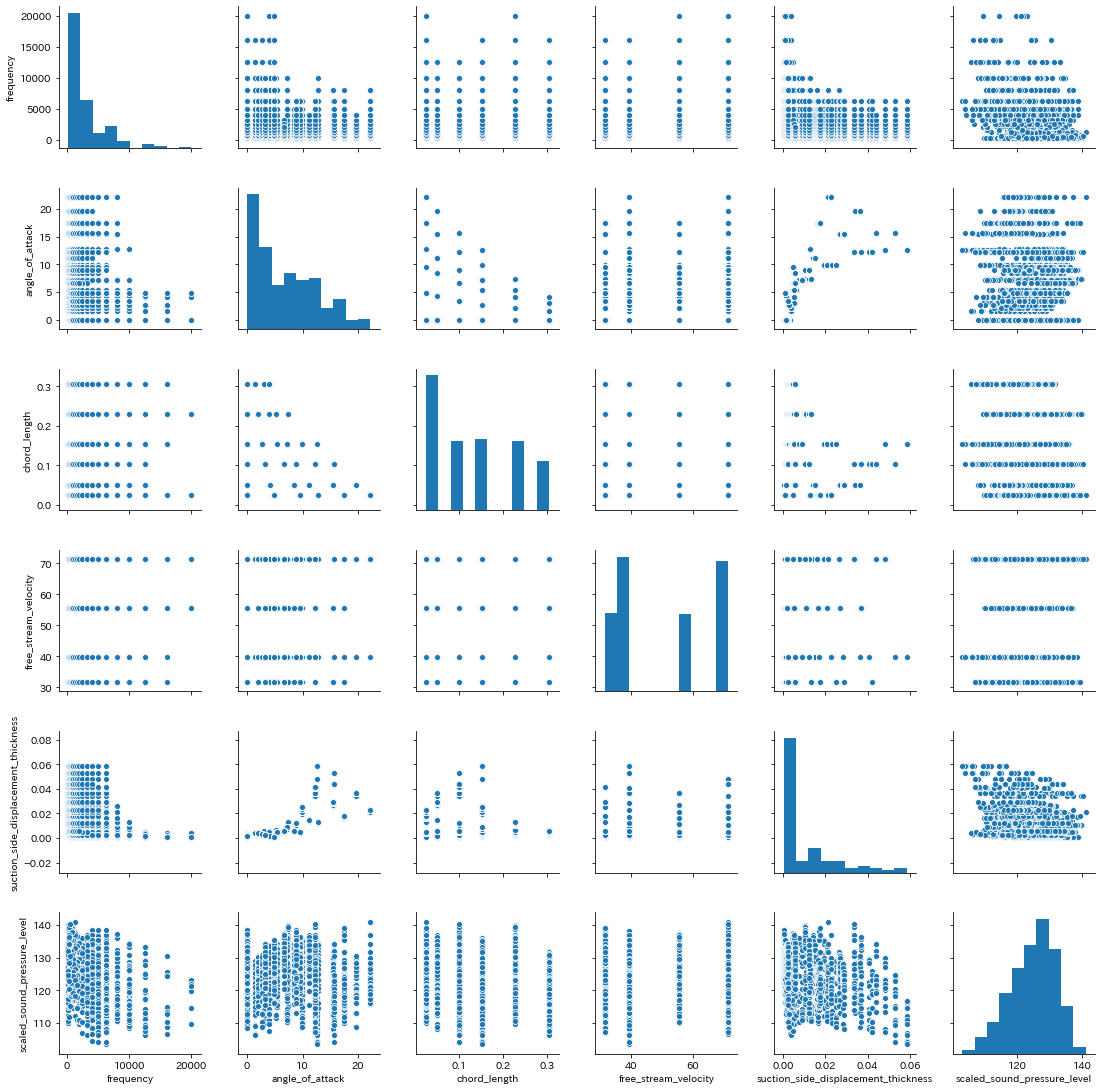

In [6]:
## ライブラリの使用を宣言します
import seaborn as sns

## 各統計データの可視化
correlation = sns.pairplot(data)

## データの前処理

### 説明変数と目的変数の設定
今回の目的変数(予測したい変数)は6列目の「scaled_sound_pressure_level」で、説明変数(入力条件)はそれ以外の5つの変数です。  
目的変数のデータと説明変数のデータをそれぞれ変数YとXに代入して、データフレームとして表示してみましょう。

In [7]:
## 目的変数
Y = data["scaled_sound_pressure_level"]

## 説明変数
X = data.drop("scaled_sound_pressure_level",axis=1) 

変数XとYにそれぞれデータを代入しました。  
`変数["カラム名"]`で変数データ内のカラム名に該当する領域を抜き取ります。  
`変数.drop("カラム名")`で変数データ内のカラム名以外の領域を抜き取ります。  

代入したXとYを確認してみましょう。

In [8]:
## 目的変数データの表示
Y.head()

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: scaled_sound_pressure_level, dtype: float64

In [9]:
## 説明変数データの表示
X.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


学習する際は、カラムを含むデータフレームではなくデータ部のみを利用します。  
そこで、
- カラム（label）
- 説明変数データ部（X）
- 目的変数データ部（Y）  
に分けてデータを管理します。

In [10]:
## データの分類
label =X.columns
X = X.values
Y = Y.values.reshape((-1,1))
print("説明変数カラム名一覧")
print(label)
print("==========")
print("X:")
print(X)
print("==========")
print("Y:")
print(Y)

説明変数カラム名一覧
Index(['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity',
       'suction_side_displacement_thickness'],
      dtype='object')
X:
[[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 ...
 [4.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]
 [5.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]
 [6.30000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]]
Y:
[[126.201]
 [125.201]
 [125.951]
 ...
 [106.604]
 [106.224]
 [104.204]]


`変数.columns`で変数データ内のカラムを、`変数.values`で変数データ内のデータ部を取得します。  
`変数.reshape((-1,1))`で変数データ内の形状を1列になるように再配列させます。

### データの分割

モデルが適切な予測をできるか確認するために開発用データ(学習データと検証データ)とテスト用データに分ける必要があります。ライブラリscikit-learnのtrain_test_split関数を使えば簡単にデータの分割を行うことができます。

In [11]:
## ライブラリの中のメソッドの使用を宣言します
from sklearn.model_selection import train_test_split

## 全データを開発用データと検証データに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

## 開発用データを学習データと検証データに分割
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0) 

print("学習データの形")
print(X_train.shape)
print("==========")
print("検証データの形")
print(X_val.shape)
print("==========")
print("テストデータの形")
print(X_test.shape)

学習データの形
(1081, 5)
検証データの形
(121, 5)
テストデータの形
(301, 5)


train_test_split関数によって分割したい元のデータを指定するtest_sizeの割合によって分割します。random_stateに値を入れることで何度実行しても同じランダムな分割を返してくるように固定します。

### データの標準化

変数間のスケールをそろえるためにデータの標準化を行う必要があります。スケールをそろえないと大きいスケールの変数に引っぱられた結果が得られてしまうからです。  

標準化はライブラリscikit-learn.preprocessingのStandardScalerを使うと簡単に実装できます。
標準化するにはデータの平均と分散を計算します。そのため、まずは`変換器.fit()`で変換に必要な平均と分散を計算します。つまり、変換器の設定を行うわけです。  
その後、`変換器.transform()`で設定した値を用いてデータを変換します。  
変換式は次の通りです
$$ X_{std} = \frac{X - \mu}{\sigma}$$
$X$は変換前のデータ、$X_{std}$は変換後のデータ、$\mu$は平均、$\sigma$は分散です。

In [12]:
## ライブラリの中のメソッドの使用を宣言します
from sklearn.preprocessing import StandardScaler

## 変換器を定義
stdsc_X = StandardScaler() 

## 変換器の設定(X_trainの平均と分散で変換を行う)
stdsc_X.fit(X_train) 

## それぞれ変換
X_train_std = stdsc_X.transform(X_train) 
X_val_std = stdsc_X.transform(X_val)
X_test_std = stdsc_X.transform(X_test) 

## Yを変換するための変換器
stdsc_Y = StandardScaler() 

## 変換器の設定(X_trainの平均と分散で変換を行う)
stdsc_Y.fit(Y_train) 

## それぞれ変換
Y_train_std = stdsc_Y.transform(Y_train) 
Y_val_std = stdsc_Y.transform(Y_val) 
Y_test_std = stdsc_Y.transform(Y_test) 

このように、`.fit()`で変換器やモデルの設定を行い、変換器なら`.transform()`で変換を行います。  

## 学習

ここまでで学習（モデルの作成）に必要なデータの準備が整いました。ここでデータの前処理と学習について整理をしましょう。

<img src="./data/pre.png" width="800"> 

データの前処理までで全データを
- 説明変数と目的変数に設定する
- 学習、検証、テストデータに分割する
- 標準化する  

を行いました。

学習では、
<img src="./data/train.png" width="800"> 
1. モデルを定義する  
    ・ ライブラリから、使用するモデルを選択し変数に代入する
2. モデルにデータを学習させる  
    ・ 学習データをモデルに与えて、データのパターンをモデルに学習させる
3. 検証データを使ってハイパーパラメータを決定する  
    ・ ハイパーパラメータの組合せの候補を学習モデルに代入して予測データを検証データで評価する  
4. 汎化性能を評価する  
    ・ テストデータの説明変数を学習済みモデルに入力して予測データを得る  
    ・ 予測データとテストデータの目的変数を使って評価する

という流れになります。

この作業をするために必要なライブラリやメソッドが用意されています。それらのツールを調べて使えるようになればOKです。  
ここでは、**何をしているのか、その結果どうなったか**が理解できれば十分です。

以下ではいくつかの回帰手法を紹介します。

### 線形(重)回帰
線形(重)回帰は
$$\hat{y}(x,\textbf{w}) = w_0 + {w_1}x_1 + {w_2}x_2 + \cdots+{w_D}x_D= \sum_{j=0}^Dw_jx_j$$  
で回帰します。パラメータは二乗和誤差$$L(y,\hat{y}) = \sum_x(\hat{y}(x,\textbf{w}) - y)^2$$を最小化するように定めます。


`モデル.fit()`で設定(学習)、`モデル.predict()`で予測ができます。

In [13]:
## ライブラリの中のメソッドの使用を宣言します
from sklearn.linear_model import LinearRegression

## 1.モデルを定義
reg = LinearRegression()

## 2.学習
reg.fit(X_train_std, Y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
## 3.ハイパーパラメータ調整
## 線形回帰モデルにはハイパーパラメータの調整はありません

次にこの予測データと目的変数のテストデータを使って汎化性能を評価してみましょう。その評価で使用するR2スコアは  
$$R^2 = 1 - \frac{\sum_x(\hat{y}(x,\textbf{w}) - y)^2}{\sum_x(\bar{y}(x,\textbf{w}) - y)^2}$$
と表現されます。`モデル.score()`でR2スコアを計算できます。R2スコアは0～1の値を取り、1に近いほど予測と実際の値のズレが小さいです。さらに、縦軸に予測値、横軸に観測値をプロットして予測と実際の値のズレを可視化することができます。これはObserved-Predicted Plot (またはyyplot)と呼ばれ、対角線からのズレが小さいほど正確な予測をおこなえていることになります。

In [15]:
## 4.評価
y_pred_lr = reg.predict(X_test_std)
print("R2 score(重回帰) : " + str(reg.score(X_test_std,Y_test_std))) 

R2 score(重回帰) : 0.5564227574587328


得られたスコアが低いか高いか、いかがでしたか。  
絶対的に値で判断をすることはありますが、他の手法と比較して評価してもいいですね。

さらにyyplotを作成して予測と実際の値のズレを可視化しましょう。  
以下は可視化のためのコードであり、解析ではありません。

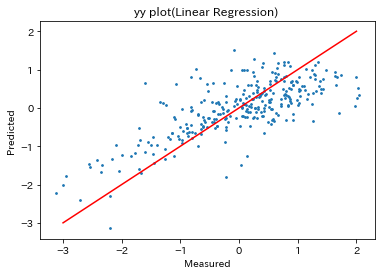

In [16]:
## yyplotの作成
%matplotlib inline

## ライブラリの使用を宣言します
import matplotlib.pyplot as plt
import numpy as np

line = np.linspace(-3,2,100)

## 線形の赤線の作成
plt.plot(line,line,color="r")

## 予測と実際の値の散布図
plt.scatter(Y_test_std,y_pred_lr,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("yy plot(Linear Regression) ")
plt.show()

### Lasso
Lassoは線形回帰を正則化（モデルの複雑さを抑制）したもので、影響度の低いと思われるパラメータの値を0にします。これにより、特徴量の削減が可能です。
データに余計な情報が含まれている場合や、データ数(行数)に対してパラメータ数(列数)が多い場合などはLassoが向いています。  
また、Lassoには正則化の強さを決めるalphaというハイパーパラメータが存在します。alphaは0から1までの値をとり、1に近いほど正則化が強くなります(デフォルトは1)。このハイパーパラメータの値を決めるために検証（validation）データを使用します。

In [17]:
## ライブラリの中のメソッドの使用を宣言します
from sklearn.linear_model import Lasso

## 1.モデルを定義
lasso = Lasso() 

## 2.学習
lasso.fit(X_train_std, Y_train_std)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
## 3.ハイパーパラメータ調整
## 検証データを使ってR2スコアを算出
print("R2 score(Lasso) : " + str(lasso.score(X_val_std,Y_val_std))) 

R2 score(Lasso) : -0.022323377046123083


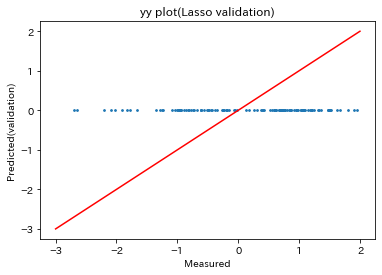

In [19]:
## 予測
y_pred_val = lasso.predict(X_val_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測と検証データの値の散布図
plt.scatter(Y_val_std,y_pred_val,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted(validation)')
plt.title("yy plot(Lasso validation)")
plt.show()

非常に低い値のR2スコアになってしまいました。これは、正則化が強すぎて全ての重みが0になってしまったことが原因です。いろいろなalphaの値で試して最もいいalphaの値を探索していきましょう。

alphaの候補を、0, 0.2, 0.4, 0.6, 0.8, 1,　として一つずつalphaに値を与えてR2スコアを算出してみます。  
for文を使用して単純作業を簡略化してコーディングします。

In [20]:
## 探索するalphaの候補を設定
alpha_list = [0, 0.2, 0.4, 0.6, 0.8, 1.] 

## alpha_listからalphaを1つ取り出し、alphaを代入したモデルに検証データを使って算出したR2スコアを表示する、という
## 一連の操作を候補数6回分繰り返す
for alpha in alpha_list:
    
    ## alpha_listのそれぞれの値にalphaを設定
    lasso_val = Lasso(alpha=alpha) 
    
    ## alphaを変えて学習
    lasso_val.fit(X_train_std, Y_train_std)
    
    ## 学習したモデルに検証データを使ってR2スコアを算出
    print("R2 score(alpha={}) : ".format(alpha) + str(lasso_val.score(X_val_std,Y_val_std))) 

R2 score(alpha=0) : 0.41753130325818877
R2 score(alpha=0.2) : 0.1656547469453199
R2 score(alpha=0.4) : -0.016916139833095034
R2 score(alpha=0.6) : -0.022323377046123083
R2 score(alpha=0.8) : -0.022323377046123083
R2 score(alpha=1.0) : -0.022323377046123083


C:\Users\f0771\Anaconda3\envs\Python_Kohei\lib\site-packages\ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
C:\Users\f0771\Anaconda3\envs\Python_Kohei\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\f0771\Anaconda3\envs\Python_Kohei\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262.8259722407556, tolerance: 0.1081
  positive)


今回のデータはパラメータ数が少なく、alphaが大きいと必要な情報まで落とされてしまうためalphaの値を大きくするとスコアが下がってしまうことがわかりました。そこで最終的なモデルとして、alphaの値をかなり小さく0.01に設定して、テストデータを用いて評価していきます。

In [21]:
## 4.評価
## ハイパーパラメータを指定したモデルを定義
alpha = 0.01
lasso = Lasso(alpha=alpha) 

## 学習
lasso.fit(X_train_std, Y_train_std)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
## テストデータを使った評価
print("R2 score(Lasso) : " + str(lasso.score(X_test_std,Y_test_std))) 

R2 score(Lasso) : 0.553833999309378


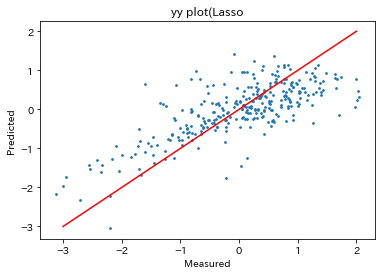

In [23]:
## 予測
y_pred_la = lasso.predict(X_test_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測とテストデータの値の散布図
plt.scatter(Y_test_std,y_pred_la,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("yy plot(Lasso")
plt.show()

このように、validationデータを利用してモデルのハイパーパラメータ(複雑さや正則化の強さなど)を調節してtestデータで最終的な性能を評価するという流れを今後一貫して行っていきます。

### Ridge回帰

Ridge回帰も線形回帰を正則化したものですがLassoとは違い、パラメータの値を大きくなるのを防ぎますが0にすることはしません。Ridge回帰の実装もモデルの定義、`モデル.fit()`で学習、`モデル.predict()`で予測`モデル.score()`でスコアを算出という流れは同じです。  
Ridge回帰も正則化の強さを決めるalphaというハイパーパラメータがあります。こちらもデフォルトの値は1です。

In [24]:
## ライブラリの中のメソッドの使用を宣言します
from sklearn.linear_model import Ridge

## 1.モデルを定義
ridge = Ridge()

## 2.学習
ridge.fit(X_train_std,Y_train_std)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
## 3.ハイパーパラメータ調整
## 検証データを使ってR2スコアを算出
print("R2 score(Ridge) : " + str(ridge.score(X_val_std,Y_val_std))) 

R2 score(Ridge) : 0.4174667868840355


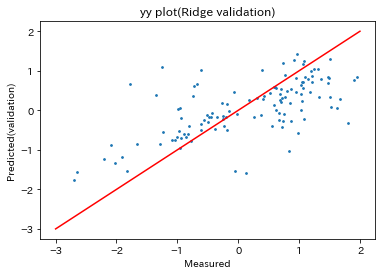

In [26]:
## 予測
y_pred_val = ridge.predict(X_val_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測と検証データの値の散布図
plt.scatter(Y_val_std,y_pred_val,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted(validation)')
plt.title("yy plot(Ridge validation)")
plt.show()

In [27]:
## 探索するalphaの候補を設定
alpha_list = [0, 0.5, 1., 1.5, 2.0,40] 

## alpha_listからalphaを1つ取り出し、alphaを代入したモデルに検証データを使って算出したR2スコアを表示する、という
## 一連の操作を候補数6回分繰り返す
for alpha in alpha_list:
    
    ## alpha_listのそれぞれの値にalphaを設定
    ridge_val = Ridge(alpha=alpha) 
    
    ## alphaを変えて学習
    ridge_val.fit(X_train_std, Y_train_std)
    
    ## 学習したモデルに検証データを使ってR2スコアを算出
    print("R2 score(alpha={}) : ".format(alpha) + str(ridge_val.score(X_val_std,Y_val_std)))  

R2 score(alpha=0) : 0.41753130325818866
R2 score(alpha=0.5) : 0.4174992229668434
R2 score(alpha=1.0) : 0.4174667868840355
R2 score(alpha=1.5) : 0.41743399766302325
R2 score(alpha=2.0) : 0.41740085792504644
R2 score(alpha=40) : 0.41401839605062307


alphaが増えるとR2スコアは僅かに減少する傾向が見られます。alpha=0～2.0ではほとんど変化していませんし、alpha=40と大きく増やしてもR2スコアの変化量は僅かです。  
つまりR2スコアに対するalphaの影響はかなり少ないといえそうですが、ここではalpha=0.001としておきましょう。

In [28]:
## 4.予測
## ハイパーパラメータを指定したモデルを定義
alpha = 0.001
ridge = Ridge(alpha=alpha)

## 学習
ridge.fit(X_train_std,Y_train_std)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
## テストデータを使った評価
print("R2 score(Ridge) : " + str(ridge.score(X_test_std,Y_test_std))) 

R2 score(Ridge) : 0.556422716830479


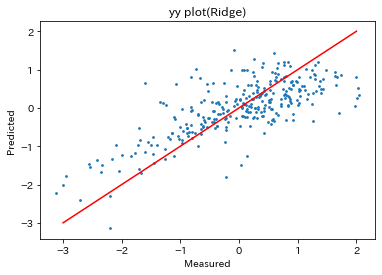

In [30]:
## 予測
y_pred_ri = ridge.predict(X_test_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測とテストデータの値の散布図
plt.scatter(Y_test_std,y_pred_ri,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("yy plot(Ridge)")
plt.show()

### Elastic Net
Elastic NetはLassoとRidge回帰を組み合わせたモデルです。  
ハイパーパラメータには`l1_ratio`と`alpha`があります。`l1_ratio`は`l1_ratio=0`をRidge回帰、`l1_ratio=1`をLasso、としたときの割合で、0～1の数値を入力します。`alpha`は正則化の強さです。

In [31]:
## ライブラリの中のメソッドの使用を宣言します
from sklearn.linear_model import ElasticNet

## 1.モデルを定義
net = ElasticNet(l1_ratio=0.2,alpha=0.1) 

## 2.学習
net.fit(X_train_std, Y_train_std)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
## 3.ハイパーパラメータ調整
## 初期設定したハイパーパラメータの値での評価として、validationデータを使ってR2スコアを算出
print("R2 score(ElasticNet) : " + str(net.score(X_val_std,Y_val_std))) 

R2 score(ElasticNet) : 0.3942307865796689


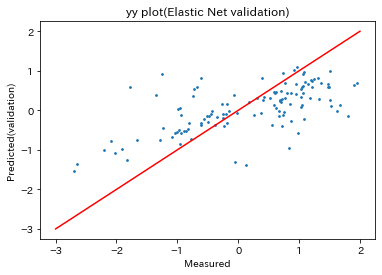

In [33]:
## 予測
y_pred_val = net.predict(X_val_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測と検証データの値の散布図
plt.scatter(Y_val_std,y_pred_val,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted(validation)')
plt.title("yy plot(Elastic Net validation)")
plt.show()

In [34]:
## 探索するalphaとl1_ratioの候補を設定
alpha_list = [0.01,0.2, 0.5] 
l1_ratio_list = [0.1,0.4,0.7,0.9]

## それぞれのlistからalphaとl1_ratioの全組合せを1つずつ取り出して代入したモデルに検証データを使って算出したR2スコアを表示する、という
## 一連の操作を候補数20回分繰り返す
for alpha in alpha_list:
    for ratio in l1_ratio_list:
        
        ## li_ratioとalphaを指定したモデルを定義
        net = ElasticNet(l1_ratio=ratio, alpha=alpha)
        
        ## 学習
        net.fit(X_train_std, Y_train_std)
        
        ## 学習したモデルに検証データを使ってR2スコアを算出
        print("R2 score(alpha={0}, l1_ratio={1}) : ".format(alpha,ratio) + str(net.score(X_val_std,Y_val_std)))  

R2 score(alpha=0.01, l1_ratio=0.1) : 0.4165055656397316
R2 score(alpha=0.01, l1_ratio=0.4) : 0.41570000482208747
R2 score(alpha=0.01, l1_ratio=0.7) : 0.4148282856518656
R2 score(alpha=0.01, l1_ratio=0.9) : 0.41420801216186287
R2 score(alpha=0.2, l1_ratio=0.1) : 0.37369956276433747
R2 score(alpha=0.2, l1_ratio=0.4) : 0.3150249257256894
R2 score(alpha=0.2, l1_ratio=0.7) : 0.23365704571634094
R2 score(alpha=0.2, l1_ratio=0.9) : 0.1889144679921112
R2 score(alpha=0.5, l1_ratio=0.1) : 0.2855988448202845
R2 score(alpha=0.5, l1_ratio=0.4) : 0.11946795622609674
R2 score(alpha=0.5, l1_ratio=0.7) : -0.0034177078459829424
R2 score(alpha=0.5, l1_ratio=0.9) : -0.022323377046123083


alphaとl1_ratioの値に応じたR2スコアの傾向が見えてきたと思います。ここではalpha=0.01、l1_ratio=0.4とします。

In [35]:
## 4.評価
## ハイパーパラメータを指定したモデルを定義
l1_ratio = 0.4
alpha = 0.01
net = ElasticNet(l1_ratio=l1_ratio,alpha=alpha) 

## 学習
net.fit(X_train_std, Y_train_std)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
## テストデータを使った評価
print("R2 score(ElasticNet) : " + str(net.score(X_test_std,Y_test_std))) 

R2 score(ElasticNet) : 0.5551273799205838


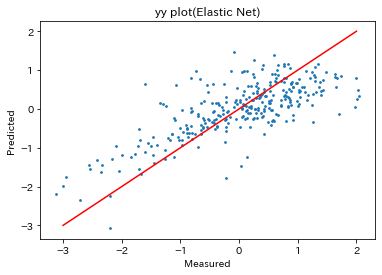

In [37]:
## 予測
y_pred_en = net.predict(X_test_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測とテストデータの値の散布図
plt.scatter(Y_test_std,y_pred_en,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("yy plot(Elastic Net)")
plt.show()

ここまで、データセット"Airfoil Self-Noise Data Set"に対して線形回帰とLasso、Ridge、Elastic Netという機械学習の回帰手法の作法をみてきました。今回のデータセットに対しては、線形回帰や正則化を抑えた他の手法のR2スコアが高い結果を示しました。
つまりモデルの表現力が高い方が今回のデータにはR2スコアが高くなるといえそうです可能性があります。  

次に、線形回帰よりも表現力を高くできるニューラルネットワークを紹介します。

以上のように整形されたデータさえあれば、機械学習のモデルを構築し、評価すること自体は非常に簡単に行えます。まとめると、scikit-learnでの回帰モデルの実装は以下のようになります。

・モデルのインポート  
・モデルの定義(呼び出し)  
・`.fit()`で学習  
・`.score()`でスコアを算出  
・`.predict()`で予測  

このように、一度モデルを学習してしまえば`モデル.predict(新しい入力)`で新たな入力に対する出力の値の予測は一瞬で行うことができるようになります。

### ニューラルネットワーク

ニューラルネットワークは予測性能に優れており現在最も使用される機械学習手法です。  
ニューラルネットワークはハイパーパラメータの設定が必須です。 以下ではニューラルネットワークの構造を示しながらハイパーパラメータについて説明します。  
まずは単層ニューラルネットワークについてです。これはニューラルネットワークのシンプルなモデルです。
<img src="./data/nunet_single.png" width="800">

丸で表現される「ノード」がその先の「ノード」と矢印で結ばれています。左側のノードは入力値を表し、入力値と重み$w$の線形和が右側のノードへ出力されます。さらにこの線形和を非線形変換することで表現力の高いモデル構造へと進化させています。非線形変換する関数のことを「活性化関数」といいます。

<img src="./data/nunet.png" width="800">

上図は使用するデータセットに合わせたニューラルネットワークのモデルの一例です。  
ニューラルネットワークは入力層と出力層の間に中間層を挟む構造のモデルです。入力層の各ノードから隣の層の各ノードへの入出力を繰り返して出力層のノードに出力されます。入力層のノード数は説明変数の種類、出力層のノード数は目的変数の種類です。中間層を3層としていますが、この「層数」と各「ノード数」を調整することでニューラルネットワークのモデルの表現力を変えます。

以上から、ニューラルネットワークのハイパーパラメータは主に  
- 中間層の層数  
- 中間層のノード数  
- 活性化関数  

です。

In [38]:
## ライブラリの中のメソッドの使用を宣言します
from keras import models
from keras import layers

## 1.モデルを定義
def build_model(intermidiate, node, activation):
    model = models.Sequential()
    model.add(layers.Dense(node,activation=activation,input_shape=(X_train.shape[1],)))
    for i in range(intermidiate-1):
        model.add(layers.Dense(node,activation=activation))
    model.add(layers.Dense(Y.shape[1]))
    model.compile(optimizer="Adam",loss="mse",metrics=["mae"])
    return model

## モデルのハイパーパラメータ設定
## 中間層の層数
intermidiate = 2
## 中間層の各ノード数
node = 10
## 活性化関数
activation = "relu"
##一つの訓練データを繰り返して学習させる回数
num_epochs =500

## モデルの定義
model = build_model(intermidiate,node,activation)

## 2.学習
history = model.fit(X_train_std,Y_train_std,validation_data=(X_val_std,Y_val_std),epochs=num_epochs,batch_size=32)

Using TensorFlow backend.









Train on 1081 samples, validate on 121 samples
Epoch 1/500





1081/1081 [==============================] - 1s 485us/step - loss: 1.1100 - mean_absolute_error: 0.8529 - val_loss: 1.2029 - val_mean_absolute_error: 0.9360
Epoch 2/500
1081/1081 [==============================] - 0s 31us/step - loss: 0.9272 - mean_absolute_error: 0.7824 - val_loss: 1.0629 - val_mean_absolute_error: 0.8813
Epoch 3/500
1081/1081 [==============================] - 0s 31us/step - loss: 0.8016 - mean_absolute_error: 0.7231 - val_loss: 0.9646 - val_mean_absolute_error: 0.8283
Epoch 4/500
1081/1081 [==============================] - 0s 30us/step - loss: 0.7094 - mean_absolute_error: 0.6761 - val_loss: 0.8854 - val_mean_absolute_error: 0.7751
Epoch 5/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.6352 - mean_absolute_error: 0.6342 - val_loss: 0.8204 - val_mean_absolute_error: 0.7238
Epoch 6/500
1081/1081 [==============================] - 0s 30us/step - loss: 0.5712 - mean_absolute

Epoch 34/500
1081/1081 [==============================] - 0s 27us/step - loss: 0.2478 - mean_absolute_error: 0.3676 - val_loss: 0.3557 - val_mean_absolute_error: 0.4386
Epoch 35/500
1081/1081 [==============================] - 0s 26us/step - loss: 0.2446 - mean_absolute_error: 0.3645 - val_loss: 0.3516 - val_mean_absolute_error: 0.4385
Epoch 36/500
1081/1081 [==============================] - 0s 26us/step - loss: 0.2420 - mean_absolute_error: 0.3628 - val_loss: 0.3527 - val_mean_absolute_error: 0.4410
Epoch 37/500
1081/1081 [==============================] - 0s 27us/step - loss: 0.2387 - mean_absolute_error: 0.3607 - val_loss: 0.3540 - val_mean_absolute_error: 0.4380
Epoch 38/500
1081/1081 [==============================] - 0s 28us/step - loss: 0.2367 - mean_absolute_error: 0.3579 - val_loss: 0.3497 - val_mean_absolute_error: 0.4348
Epoch 39/500
1081/1081 [==============================] - 0s 25us/step - loss: 0.2357 - mean_absolute_error: 0.3555 - val_loss: 0.3462 - val_mean_absolute_

1081/1081 [==============================] - 0s 29us/step - loss: 0.1154 - mean_absolute_error: 0.2501 - val_loss: 0.1618 - val_mean_absolute_error: 0.3082
Epoch 131/500
1081/1081 [==============================] - 0s 27us/step - loss: 0.1156 - mean_absolute_error: 0.2499 - val_loss: 0.1651 - val_mean_absolute_error: 0.3107
Epoch 132/500
1081/1081 [==============================] - 0s 27us/step - loss: 0.1156 - mean_absolute_error: 0.2494 - val_loss: 0.1632 - val_mean_absolute_error: 0.3129
Epoch 133/500
1081/1081 [==============================] - 0s 28us/step - loss: 0.1151 - mean_absolute_error: 0.2511 - val_loss: 0.1685 - val_mean_absolute_error: 0.3130
Epoch 134/500
1081/1081 [==============================] - 0s 26us/step - loss: 0.1140 - mean_absolute_error: 0.2495 - val_loss: 0.1594 - val_mean_absolute_error: 0.3074
Epoch 135/500
1081/1081 [==============================] - 0s 26us/step - loss: 0.1140 - mean_absolute_error: 0.2488 - val_loss: 0.1540 - val_mean_absolute_error: 0

Epoch 178/500
1081/1081 [==============================] - 0s 26us/step - loss: 0.0944 - mean_absolute_error: 0.2256 - val_loss: 0.1279 - val_mean_absolute_error: 0.2623
Epoch 179/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.0945 - mean_absolute_error: 0.2282 - val_loss: 0.1301 - val_mean_absolute_error: 0.2639
Epoch 180/500
1081/1081 [==============================] - 0s 30us/step - loss: 0.0939 - mean_absolute_error: 0.2265 - val_loss: 0.1299 - val_mean_absolute_error: 0.2644
Epoch 181/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.0951 - mean_absolute_error: 0.2283 - val_loss: 0.1254 - val_mean_absolute_error: 0.2599
Epoch 182/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.0934 - mean_absolute_error: 0.2253 - val_loss: 0.1250 - val_mean_absolute_error: 0.2579
Epoch 183/500
1081/1081 [==============================] - 0s 30us/step - loss: 0.0954 - mean_absolute_error: 0.2288 - val_loss: 0.1247 - val_mean_abs

1081/1081 [==============================] - 0s 29us/step - loss: 0.0786 - mean_absolute_error: 0.2079 - val_loss: 0.1097 - val_mean_absolute_error: 0.2443
Epoch 275/500
1081/1081 [==============================] - 0s 27us/step - loss: 0.0780 - mean_absolute_error: 0.2072 - val_loss: 0.1081 - val_mean_absolute_error: 0.2404
Epoch 276/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.0770 - mean_absolute_error: 0.2057 - val_loss: 0.1078 - val_mean_absolute_error: 0.2444
Epoch 277/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.0784 - mean_absolute_error: 0.2076 - val_loss: 0.1076 - val_mean_absolute_error: 0.2456
Epoch 278/500
1081/1081 [==============================] - 0s 28us/step - loss: 0.0774 - mean_absolute_error: 0.2062 - val_loss: 0.1071 - val_mean_absolute_error: 0.2415
Epoch 279/500
1081/1081 [==============================] - 0s 30us/step - loss: 0.0766 - mean_absolute_error: 0.2053 - val_loss: 0.1093 - val_mean_absolute_error: 0

Epoch 370/500
1081/1081 [==============================] - 0s 30us/step - loss: 0.0719 - mean_absolute_error: 0.1993 - val_loss: 0.0978 - val_mean_absolute_error: 0.2335
Epoch 371/500
1081/1081 [==============================] - 0s 30us/step - loss: 0.0705 - mean_absolute_error: 0.1963 - val_loss: 0.0986 - val_mean_absolute_error: 0.2403
Epoch 372/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.0708 - mean_absolute_error: 0.1992 - val_loss: 0.1005 - val_mean_absolute_error: 0.2335
Epoch 373/500
1081/1081 [==============================] - 0s 29us/step - loss: 0.0713 - mean_absolute_error: 0.1988 - val_loss: 0.1005 - val_mean_absolute_error: 0.2356
Epoch 374/500
1081/1081 [==============================] - 0s 31us/step - loss: 0.0711 - mean_absolute_error: 0.1963 - val_loss: 0.0997 - val_mean_absolute_error: 0.2366
Epoch 375/500
1081/1081 [==============================] - 0s 31us/step - loss: 0.0703 - mean_absolute_error: 0.1973 - val_loss: 0.1020 - val_mean_abs

1081/1081 [==============================] - 0s 58us/step - loss: 0.0692 - mean_absolute_error: 0.1945 - val_loss: 0.0964 - val_mean_absolute_error: 0.2364
Epoch 467/500
1081/1081 [==============================] - 0s 44us/step - loss: 0.0675 - mean_absolute_error: 0.1927 - val_loss: 0.0983 - val_mean_absolute_error: 0.2350
Epoch 468/500
1081/1081 [==============================] - 0s 47us/step - loss: 0.0677 - mean_absolute_error: 0.1923 - val_loss: 0.0974 - val_mean_absolute_error: 0.2372
Epoch 469/500
1081/1081 [==============================] - 0s 43us/step - loss: 0.0677 - mean_absolute_error: 0.1924 - val_loss: 0.0977 - val_mean_absolute_error: 0.2372
Epoch 470/500
1081/1081 [==============================] - 0s 40us/step - loss: 0.0676 - mean_absolute_error: 0.1920 - val_loss: 0.0984 - val_mean_absolute_error: 0.2414
Epoch 471/500
1081/1081 [==============================] - 0s 38us/step - loss: 0.0672 - mean_absolute_error: 0.1930 - val_loss: 0.0955 - val_mean_absolute_error: 0

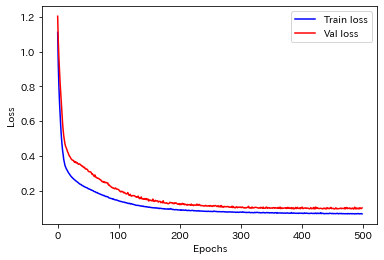

In [39]:
## 学習曲線の表示
epochs_range=range(len(history.history["loss"]))

plt.plot(epochs_range,history.history["loss"],"b",label="Train loss")
plt.plot(epochs_range,history.history["val_loss"],"r",label="Val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

ニューラルネットワークの評価には平均2乗誤差（mse）が用いられます。  
$$MSE = \frac{1}{n}\sum_x(\hat{y}(x,\textbf{w}) - y)^2$$  
`モデル.evaluate()`で計算できます。

In [40]:
## 3.ハイパーパラメータ調整
## 検証データを使ってmseを算出
val_mse, val_mae = model.evaluate(X_val_std,Y_val_std)
print("mse_NN :{}".format(val_mse))

121/121 [==============================] - 0s 33us/step
mse_NN :0.10058940879323265


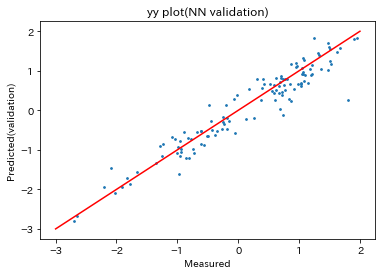

In [41]:
## 予測
y_pred_val = model.predict(X_val_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測と検証データの値の散布図
plt.scatter(Y_val_std,y_pred_val,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted(validation)')
plt.title("yy plot(NN validation)")
plt.show()

ハイパーパラメータの調整をニューラルネットワークの中間層の層数とノード数に絞りましょう。  

In [42]:
## 探索するintermidiateとnodeの候補を設定
intermidiate_list = [2,3,4,5] 
node_list = [5,10,20,40]

## それぞれのlistからintermidiateとnodeの全組合せを1つずつ取り出して代入したモデルに検証データを使って算出したmseを表示する、という
## 一連の操作を候補数の数だけ繰り返す
for intermidiate in intermidiate_list:
    for node in node_list:
        
        ## intermidiateとnodeを指定したモデルを定義
        model = build_model(intermidiate,node,activation)
        
        ## 学習
        history = model.fit(X_train_std,Y_train_std,epochs=num_epochs,batch_size=32,verbose=0)     
                
        ## 学習したモデルに検証データを使ってmseを算出
        val_mse, val_mae = model.evaluate(X_val_std,Y_val_std)
        print("intermidiate / node : {}/{} ==> mse_NN :{} ".format(intermidiate,node,val_mse))  

121/121 [==============================] - 0s 741us/step
intermidiate / node : 2/5 ==> mse_NN :0.1664707190857446 
121/121 [==============================] - 0s 865us/step
intermidiate / node : 2/10 ==> mse_NN :0.14609908133991495 
121/121 [==============================] - 0s 906us/step
intermidiate / node : 2/20 ==> mse_NN :0.07750683379444209 
121/121 [==============================] - 0s 2ms/step
intermidiate / node : 2/40 ==> mse_NN :0.050898615825028456 
121/121 [==============================] - 0s 1ms/step
intermidiate / node : 3/5 ==> mse_NN :0.14890922196517306 
121/121 [==============================] - 0s 2ms/step
intermidiate / node : 3/10 ==> mse_NN :0.0995618253638429 
121/121 [==============================] - 1s 5ms/step
intermidiate / node : 3/20 ==> mse_NN :0.06219365441602124 
121/121 [==============================] - 1s 4ms/step
intermidiate / node : 3/40 ==> mse_NN :0.044792884876104916 
121/121 [==============================] - 0s 2ms/step
intermidiate / node :

中間層の層数とそのノード数を増やすほど精度が高い結果が得られそうです。  
過学習に注意して中間層の層数とそのノード数を設定してみましょう。

In [43]:
## 4.評価
## ハイパーパラメータを指定したモデルを定義
## 中間層の層数
intermidiate = 5
## 中間層の各ノード数
node = 60
## 活性化関数
activation = "relu"
##一つの訓練データを繰り返して学習させる回数
num_epochs =500

model = build_model(intermidiate,node,activation)

## 学習
history = model.fit(X_train_std,Y_train_std,validation_data=(X_test_std,Y_test_std),epochs=num_epochs,batch_size=32) 

Train on 1081 samples, validate on 301 samples
Epoch 1/500
1081/1081 [==============================] - 2s 2ms/step - loss: 0.7814 - mean_absolute_error: 0.7151 - val_loss: 0.4948 - val_mean_absolute_error: 0.5452
Epoch 2/500
1081/1081 [==============================] - 0s 92us/step - loss: 0.4109 - mean_absolute_error: 0.5049 - val_loss: 0.3428 - val_mean_absolute_error: 0.4473
Epoch 3/500
1081/1081 [==============================] - 0s 100us/step - loss: 0.3135 - mean_absolute_error: 0.4345 - val_loss: 0.2763 - val_mean_absolute_error: 0.4008
Epoch 4/500
1081/1081 [==============================] - 0s 100us/step - loss: 0.2693 - mean_absolute_error: 0.3893 - val_loss: 0.2482 - val_mean_absolute_error: 0.3730
Epoch 5/500
1081/1081 [==============================] - 0s 129us/step - loss: 0.2531 - mean_absolute_error: 0.3736 - val_loss: 0.2193 - val_mean_absolute_error: 0.3525
Epoch 6/500
1081/1081 [==============================] - 0s 151us/step - loss: 0.2238 - mean_absolute_error: 0.

Epoch 49/500
1081/1081 [==============================] - 0s 146us/step - loss: 0.0447 - mean_absolute_error: 0.1459 - val_loss: 0.0573 - val_mean_absolute_error: 0.1749
Epoch 50/500
1081/1081 [==============================] - 0s 147us/step - loss: 0.0463 - mean_absolute_error: 0.1462 - val_loss: 0.0468 - val_mean_absolute_error: 0.1626
Epoch 51/500
1081/1081 [==============================] - 0s 103us/step - loss: 0.0403 - mean_absolute_error: 0.1407 - val_loss: 0.0539 - val_mean_absolute_error: 0.1712
Epoch 52/500
1081/1081 [==============================] - 0s 147us/step - loss: 0.0395 - mean_absolute_error: 0.1403 - val_loss: 0.0628 - val_mean_absolute_error: 0.1821
Epoch 53/500
1081/1081 [==============================] - 0s 152us/step - loss: 0.0426 - mean_absolute_error: 0.1421 - val_loss: 0.0612 - val_mean_absolute_error: 0.1831
Epoch 54/500
1081/1081 [==============================] - 0s 145us/step - loss: 0.0457 - mean_absolute_error: 0.1534 - val_loss: 0.0667 - val_mean_abs

1081/1081 [==============================] - 0s 138us/step - loss: 0.0273 - mean_absolute_error: 0.1102 - val_loss: 0.0424 - val_mean_absolute_error: 0.1557
Epoch 146/500
1081/1081 [==============================] - 0s 166us/step - loss: 0.0217 - mean_absolute_error: 0.1023 - val_loss: 0.0391 - val_mean_absolute_error: 0.1463
Epoch 147/500
1081/1081 [==============================] - 0s 88us/step - loss: 0.0126 - mean_absolute_error: 0.0804 - val_loss: 0.0350 - val_mean_absolute_error: 0.1365
Epoch 148/500
1081/1081 [==============================] - 0s 84us/step - loss: 0.0148 - mean_absolute_error: 0.0859 - val_loss: 0.0419 - val_mean_absolute_error: 0.1519
Epoch 149/500
1081/1081 [==============================] - 0s 93us/step - loss: 0.0180 - mean_absolute_error: 0.0968 - val_loss: 0.0412 - val_mean_absolute_error: 0.1427
Epoch 150/500
1081/1081 [==============================] - 0s 102us/step - loss: 0.0154 - mean_absolute_error: 0.0901 - val_loss: 0.0364 - val_mean_absolute_error

1081/1081 [==============================] - 0s 116us/step - loss: 0.0103 - mean_absolute_error: 0.0748 - val_loss: 0.0328 - val_mean_absolute_error: 0.1299
Epoch 194/500
1081/1081 [==============================] - 0s 159us/step - loss: 0.0141 - mean_absolute_error: 0.0803 - val_loss: 0.0356 - val_mean_absolute_error: 0.1439
Epoch 195/500
1081/1081 [==============================] - 0s 82us/step - loss: 0.0146 - mean_absolute_error: 0.0845 - val_loss: 0.0332 - val_mean_absolute_error: 0.1362
Epoch 196/500
1081/1081 [==============================] - 0s 89us/step - loss: 0.0100 - mean_absolute_error: 0.0709 - val_loss: 0.0378 - val_mean_absolute_error: 0.1406
Epoch 197/500
1081/1081 [==============================] - 0s 127us/step - loss: 0.0114 - mean_absolute_error: 0.0715 - val_loss: 0.0309 - val_mean_absolute_error: 0.1294
Epoch 198/500
1081/1081 [==============================] - 0s 113us/step - loss: 0.0116 - mean_absolute_error: 0.0771 - val_loss: 0.0299 - val_mean_absolute_erro

1081/1081 [==============================] - 0s 110us/step - loss: 0.0071 - mean_absolute_error: 0.0582 - val_loss: 0.0289 - val_mean_absolute_error: 0.1231
Epoch 290/500
1081/1081 [==============================] - 0s 100us/step - loss: 0.0087 - mean_absolute_error: 0.0633 - val_loss: 0.0401 - val_mean_absolute_error: 0.1433
Epoch 291/500
1081/1081 [==============================] - 0s 103us/step - loss: 0.0105 - mean_absolute_error: 0.0712 - val_loss: 0.0295 - val_mean_absolute_error: 0.1262
Epoch 292/500
1081/1081 [==============================] - 0s 106us/step - loss: 0.0125 - mean_absolute_error: 0.0764 - val_loss: 0.0364 - val_mean_absolute_error: 0.1321
Epoch 293/500
1081/1081 [==============================] - 0s 99us/step - loss: 0.0140 - mean_absolute_error: 0.0865 - val_loss: 0.0398 - val_mean_absolute_error: 0.1446
Epoch 294/500
1081/1081 [==============================] - 0s 100us/step - loss: 0.0106 - mean_absolute_error: 0.0744 - val_loss: 0.0383 - val_mean_absolute_err

1081/1081 [==============================] - 0s 130us/step - loss: 0.0410 - mean_absolute_error: 0.1350 - val_loss: 0.0491 - val_mean_absolute_error: 0.1570
Epoch 338/500
1081/1081 [==============================] - 0s 117us/step - loss: 0.0290 - mean_absolute_error: 0.1128 - val_loss: 0.0417 - val_mean_absolute_error: 0.1480
Epoch 339/500
1081/1081 [==============================] - 0s 143us/step - loss: 0.0243 - mean_absolute_error: 0.1000 - val_loss: 0.0476 - val_mean_absolute_error: 0.1651
Epoch 340/500
1081/1081 [==============================] - 0s 98us/step - loss: 0.0218 - mean_absolute_error: 0.0988 - val_loss: 0.0514 - val_mean_absolute_error: 0.1628
Epoch 341/500
1081/1081 [==============================] - 0s 105us/step - loss: 0.0203 - mean_absolute_error: 0.0947 - val_loss: 0.0412 - val_mean_absolute_error: 0.1498
Epoch 342/500
1081/1081 [==============================] - 0s 101us/step - loss: 0.0144 - mean_absolute_error: 0.0795 - val_loss: 0.0424 - val_mean_absolute_err

1081/1081 [==============================] - 0s 98us/step - loss: 0.0165 - mean_absolute_error: 0.0831 - val_loss: 0.0334 - val_mean_absolute_error: 0.1359
Epoch 386/500
1081/1081 [==============================] - 0s 84us/step - loss: 0.0105 - mean_absolute_error: 0.0719 - val_loss: 0.0379 - val_mean_absolute_error: 0.1387
Epoch 387/500
1081/1081 [==============================] - 0s 88us/step - loss: 0.0066 - mean_absolute_error: 0.0575 - val_loss: 0.0321 - val_mean_absolute_error: 0.1286
Epoch 388/500
1081/1081 [==============================] - 0s 114us/step - loss: 0.0057 - mean_absolute_error: 0.0545 - val_loss: 0.0300 - val_mean_absolute_error: 0.1262
Epoch 389/500
1081/1081 [==============================] - 0s 139us/step - loss: 0.0080 - mean_absolute_error: 0.0607 - val_loss: 0.0298 - val_mean_absolute_error: 0.1300
Epoch 390/500
1081/1081 [==============================] - 0s 82us/step - loss: 0.0120 - mean_absolute_error: 0.0670 - val_loss: 0.0465 - val_mean_absolute_error:

1081/1081 [==============================] - 0s 137us/step - loss: 0.0041 - mean_absolute_error: 0.0441 - val_loss: 0.0288 - val_mean_absolute_error: 0.1220
Epoch 482/500
1081/1081 [==============================] - 0s 131us/step - loss: 0.0072 - mean_absolute_error: 0.0551 - val_loss: 0.0335 - val_mean_absolute_error: 0.1288
Epoch 483/500
1081/1081 [==============================] - 0s 124us/step - loss: 0.0072 - mean_absolute_error: 0.0594 - val_loss: 0.0312 - val_mean_absolute_error: 0.1272
Epoch 484/500
1081/1081 [==============================] - 0s 115us/step - loss: 0.0056 - mean_absolute_error: 0.0552 - val_loss: 0.0306 - val_mean_absolute_error: 0.1271
Epoch 485/500
1081/1081 [==============================] - 0s 111us/step - loss: 0.0041 - mean_absolute_error: 0.0473 - val_loss: 0.0291 - val_mean_absolute_error: 0.1187
Epoch 486/500
1081/1081 [==============================] - 0s 120us/step - loss: 0.0040 - mean_absolute_error: 0.0432 - val_loss: 0.0297 - val_mean_absolute_er

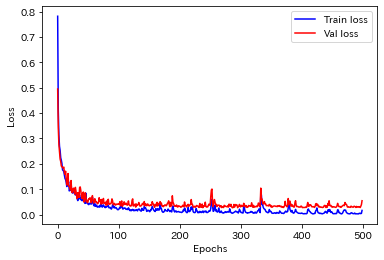

In [44]:
## 学習曲線の表示
epochs_range=range(len(history.history["loss"]))

plt.plot(epochs_range,history.history["loss"],"b",label="Train loss")
plt.plot(epochs_range,history.history["val_loss"],"r",label="Val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

121/121 [==============================] - 0s 82us/step
mse_NN :0.0716142619321169 
R2 score(NN) : 0.9459879023313772


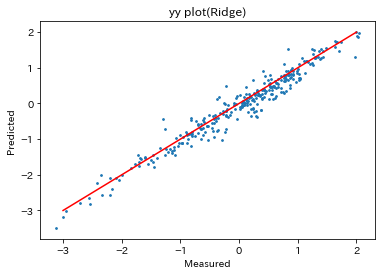

In [45]:
## 5.評価
## mseの算出
val_mse, val_mae = model.evaluate(X_val_std,Y_val_std)
print("==========")
print("mse_NN :{} ".format(val_mse))
## R2スコアの算出
from sklearn.metrics import r2_score
score = r2_score(model.predict(X_test_std),Y_test_std)
print("R2 score(NN) : " + str(score))

## 予測
y_pred_nn = model.predict(X_test_std)

## yyplotの作成
## 線形の赤線の作成
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")

## 予測とテストデータの値の散布図
plt.scatter(Y_test_std,y_pred_nn,s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("yy plot(Ridge)")
plt.show()

ここまでで5つの手法について紹介しました。各手法でのR2スコアを比較しましょう。  

In [46]:
print("R2 score(重回帰) : " + str(reg.score(X_test_std,Y_test_std))) 
print("R2 score(Lasso) : " + str(lasso.score(X_test_std,Y_test_std))) 
print("R2 score(Ridge) : " + str(ridge.score(X_test_std,Y_test_std))) 
print("R2 score(ElasticNet) : " + str(net.score(X_test_std,Y_test_std))) 
print("R2 score(Neural Network) : " + str(score))

R2 score(重回帰) : 0.5564227574587328
R2 score(Lasso) : 0.553833999309378
R2 score(Ridge) : 0.556422716830479
R2 score(ElasticNet) : 0.5551273799205838
R2 score(Neural Network) : 0.9459879023313772


強調しておきますが、今回使用したデータセットに対して作成したモデルの精度に関してはニューラルネットワークが良かったということであり、線形回帰やLasso、Ridgeなどの手法もデータセットや目的に対しては有効な手法です。

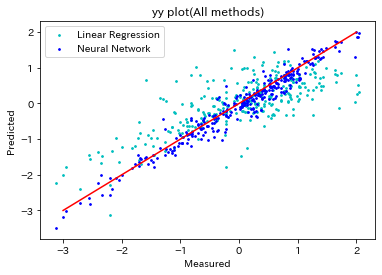

In [47]:
line = np.linspace(-3,2,100)
plt.plot(line,line,color="r")
plt.scatter(Y_test_std,y_pred_lr,c="c",label="Linear Regression",s=3)
# plt.scatter(Y_test_std,y_pred_la,c="m",label="Lasso",s=3)
# plt.scatter(Y_test_std,y_pred_ri,c="g",label="Ridge",s=3)
# plt.scatter(Y_test_std,y_pred_en,c="b",label="Elastic Net",s=3)
plt.scatter(Y_test_std,y_pred_nn,c="b",label="Neural Network",s=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("yy plot(All methods)")
plt.legend()
plt.show()

ニューラルネットワーク以外はそのプロットのほとんどが被っています。ニューラルネットワークが予測と実際の値の一致度が高いことが分かります。